In [1]:
import math
import numpy as np
import pandas as pd
import h5py

In [38]:
# Loading the dataset
train_dataset = h5py.File('C:/Users/Pathik/Desktop/Data-Science-Machine-Learning/train_signs.h5', "r") #provide proper path
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

test_dataset = h5py.File('C:/Users/Pathik/Desktop/Data-Science-Machine-Learning/test_signs.h5', "r")  #provide proper path
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

#  Normalising data 

In [41]:
train_set_x_orig = train_set_x_orig/255.00
test_set_x_orig = test_set_x_orig/255.00

# as pixels have max value = 255 and min =0
# normalize =  x-0/255-0 = x/255

In [40]:
from keras.utils import to_categorical 
train_set_y_orig =to_categorical(train_set_y_orig)


In [42]:
print(train_set_x_orig.shape)

(1080, 64, 64, 3)


In [34]:
import keras

In [47]:

from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape = (64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

        

In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])


In [51]:
model.fit(train_set_x_orig,train_set_y_orig,epochs=15)

Epoch 1/15
34/34 [==============================] - 8s 195ms/step - loss: 1.8602 - accuracy: 0.1861
Epoch 2/15
34/34 [==============================] - 6s 191ms/step - loss: 1.4274 - accuracy: 0.4399
Epoch 3/15
34/34 [==============================] - 6s 190ms/step - loss: 0.9981 - accuracy: 0.6593
Epoch 4/15
34/34 [==============================] - 7s 199ms/step - loss: 0.7210 - accuracy: 0.7503
Epoch 5/15
34/34 [==============================] - 7s 205ms/step - loss: 0.4762 - accuracy: 0.8378
Epoch 6/15
34/34 [==============================] - 6s 190ms/step - loss: 0.3939 - accuracy: 0.8554
Epoch 7/15
34/34 [==============================] - 7s 192ms/step - loss: 0.2636 - accuracy: 0.9112
Epoch 8/15
34/34 [==============================] - 7s 192ms/step - loss: 0.2421 - accuracy: 0.9225
Epoch 9/15
34/34 [==============================] - 6s 190ms/step - loss: 0.1335 - accuracy: 0.9598
Epoch 10/15
34/34 [==============================] - 7s 204ms/step - loss: 0.0751 - accuracy: 0.9786

# train data accuracy = 99%

In [60]:
test_set_y_orig = to_categorical(test_set_y_orig)

In [63]:
_,acc = model.evaluate(test_set_x_orig,test_set_y_orig,verbose=0)
    

# TEST DATA ACCURACY

In [64]:
print(acc) 

0.949999988079071


In [67]:
Y_pred = model.predict(test_set_x_orig)

In [68]:
y_pred = np.argmax(Y_pred,axis=1)

# CONFUSION MATRIX 

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [72]:
matrix = confusion_matrix(np.argmax(test_set_y_orig,axis=1),y_pred)

In [73]:
display = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=[0,1,2,3,4,5])

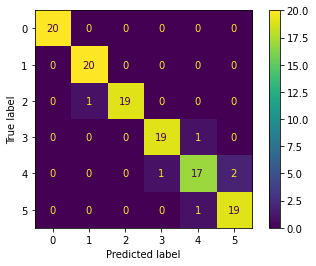

In [74]:
display.plot()